In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

import psycopg2
import pandas.io.sql as sqlio
import psycopg2.extras


In [2]:
pluto = pd.read_csv('/home/oliver/data/pluto/pluto_sym.csv')

/home/oliver/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
    cov = [
    'age'
    ,'build_alter_gap'
    ,'alterage'
    ,'alterage_squared'   
    ,'alterage_cubed'
    ,'elevator'
    ,'commercial'
    ,'garage'
    ,'storage'
    ,'basement'
    ,'waterfront'
    ,'frontage'
    ,'block_assmeblage'
    ,'cooperative'
    ,'conv_loft_wh'
    ,'tenament'
    ,'garden'
    ,'semi_fireproof'
    ,'fireproof'
    ,'luxury'
    ,'artist_res'
    ,'units_per_building'
    ,'floors'
    ,'floors_squared'
    ,'zip_avg_num_buildings'
    ,'pcvpu_l1'
    ,'pcvpu_l2'
    ,'pcvpu_l3'
    ,'avg_block_pcvpu_l1'
    ,'avg_block_pcvpu_l2'
    ,'avg_block_pcvpu_l3'
    ,'avg_neighbor1_pcvpu_l1'
    ,'avg_neighbor1_pcvpu_l2'
    ,'avg_neighbor1_pcvpu_l3'
    ,'avg_neighbor2_pcvpu_l1'
    ,'avg_neighbor2_pcvpu_l2'
    ,'avg_neighbor2_pcvpu_l3'
    ,'avg_neighbor3_pcvpu_l1'
    ,'avg_neighbor3_pcvpu_l2'
    ,'avg_neighbor3_pcvpu_l3'
    ,'avg_neighbor4_pcvpu_l1'
    ,'avg_neighbor4_pcvpu_l2'
    ,'avg_neighbor4_pcvpu_l3'
    ,'avg_zip_pcvpu_l1'
    ,'avg_zip_pcvpu_l2'
    ,'avg_zip_pcvpu_l3'
    ]

In [4]:
# Function for creating dataframes from a SQL query
def get_data(year_train, year_test, cov):
    """
    Function to return data from a train and test SQL query
    """
    global df_train, df_test, X_train, X_test, y_train, y_test, covariates

    # List of columns to be used as covariates in the model

    df_train = pluto[pluto['year']<=year_train].dropna()
    df_test = pluto[pluto['year']==year_test].dropna()

    X_train = df_train[cov]
    y_train = df_train['pcvpu_target']

    X_test = df_test[cov]
    y_test = df_test['pcvpu_target']
    return df_train, df_test, X_train, X_test, y_train, y_test

In [5]:
reg = LinearRegression()

In [6]:
# Set up empty lists to store the results of the model for each year

MAEs = [] ## Mean Absolute Error, list of numbers (out of sample)
MSEs = [] ## Mean Squared Error, list of numbers (out of sample)
R2s = []  ## R2 score, list of numbers (out of sample)

feature_importances = [] ## Feature importances, list of lists

MAEs_in_sample = [] ## Mean Absolute Error, list of numbers (in sample)
MSEs_in_sample = [] ## Mean Squared Error, list of numbers (in sample)
R2s_in_sample = []  ## R2 score, list of numbers (in sample)


def update_reports():
    """
    Function to update the reports for each year
    """
    print('Updating Out of Sample Reports')

    MSEs.append(mean_squared_error(y_test, y_pred))
    MAEs.append(mean_absolute_error(y_test, y_pred))
    R2s.append(r2_score(y_test, y_pred))
    print('MSE: {}'.format(MSEs[-1]))
    print('MAE: {}'.format(MAEs[-1]))
    print('R2: {}'.format(R2s[-1]))

    print('Updating In Sample Reports')

    MSEs_in_sample.append(mean_squared_error(y_train, y_pred_in_sample))
    MAEs_in_sample.append(mean_absolute_error(y_train, y_pred_in_sample))
    R2s_in_sample.append(r2_score(y_train, y_pred_in_sample))
    print('MSE: {}'.format(MSEs_in_sample[-1]))
    print('MAE: {}'.format(MAEs_in_sample[-1]))
    print('R2: {}'.format(R2s_in_sample[-1]))



In [7]:
# get data from 2008 and 2009
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2008, 2009, cov)


In [8]:
# fit the model for 2008 and 2009
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make in and out of sample predictions
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)

In [10]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 322.12951099473935
MAE: 6.770375218212331
R2: -0.0023569288262330623
Updating In Sample Reports
MSE: 412.949279102006
MAE: 7.453972111210664
R2: 0.14015867597920184


In [11]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2009, 2010, cov)

In [12]:
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)

In [14]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 225.0075817117932
MAE: 6.702885149294335
R2: -0.11985325974924788
Updating In Sample Reports
MSE: 360.583157340509
MAE: 6.879069087190322
R2: 0.09938566958955075


In [15]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2010, 2011, cov)

In [16]:
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)

In [18]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 48.39980544227517
MAE: 4.084137885274899
R2: -0.6691068223509133
Updating In Sample Reports
MSE: 310.7730787023011
MAE: 6.663046547802739
R2: 0.06529397293962458


In [19]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2011, 2012, cov)

In [20]:
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)

In [22]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 140.7663773469857
MAE: 5.2837176410675655
R2: -0.04310855494635324
Updating In Sample Reports
MSE: 242.35348164215236
MAE: 5.817394517297359
R2: 0.05031743027701485


In [23]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2012, 2013, cov)

In [24]:
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)

In [26]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 139.96036173944924
MAE: 5.276154986579049
R2: -0.035493858973144166
Updating In Sample Reports
MSE: 220.84481146916158
MAE: 5.653952108889431
R2: 0.04676479410964207


In [27]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2013, 2014, cov)
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)
# make predictions for the next year
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 108.93157975055922
MAE: 4.55310374584055
R2: -0.060092914319157975
Updating In Sample Reports
MSE: 206.63540761135562
MAE: 5.544923651849059
R2: 0.04140566176741234


In [28]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2014, 2015, cov)
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)
# make predictions for the next year
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 132.13007395820577
MAE: 5.165045477410839
R2: -0.03125797443023415
Updating In Sample Reports
MSE: 192.01109684459692
MAE: 5.368056470513808
R2: 0.03816154058266241


In [29]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2015, 2016, cov)
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)
# make predictions for the next year
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 96.74477975412837
MAE: 4.219697301293563
R2: -0.03383641707380103
Updating In Sample Reports
MSE: 184.17157648913812
MAE: 5.324330810321577
R2: 0.03373631155765899


In [30]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2016, 2017, cov)
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)
# make predictions for the next year
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 113.15563245571002
MAE: 4.130648783347341
R2: -0.014617882470767674
Updating In Sample Reports
MSE: 174.09288587182724
MAE: 5.183444422143708
R2: 0.031394876168473806


In [31]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2017, 2018, cov)
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)
# make predictions for the next year
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 8853.503864337361
MAE: 75.53025435152796
R2: -0.008837989370583221
Updating In Sample Reports
MSE: 167.7860703321332
MAE: 5.0649531581896055
R2: 0.02958332058535329


In [32]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2018, 2019, cov)
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)
# make predictions for the next year
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 31193.787149076434
MAE: 11.975700316192583
R2: -163.44927862588312
Updating In Sample Reports
MSE: 921.0395900380605
MAE: 12.887928421865825
R2: 0.04054826299379566


In [33]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2019, 2020, cov)
# expand the number of trees and then fit to the next year

reg.fit(X_train,y_train)
# make predictions for the next year
y_pred = reg.predict(X_test)
y_pred_in_sample = reg.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 334.8779885839387
MAE: 13.768713770479243
R2: -1.1135443061993366
Updating In Sample Reports
MSE: 863.4520427270543
MAE: 12.435671832719665
R2: 0.03736867418525747


Text(0.5, 1.0, 'R2 Scores by Year')

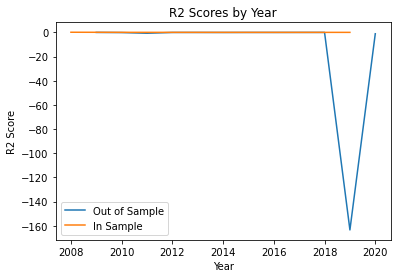

In [34]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
years_in_sample = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.plot(years, R2s, label='Out of Sample')
plt.plot(years_in_sample, R2s_in_sample, label='In Sample')
plt.legend()
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.title('R2 Scores by Year')


Text(0.5, 1.0, 'Mean Squared Error by Year')

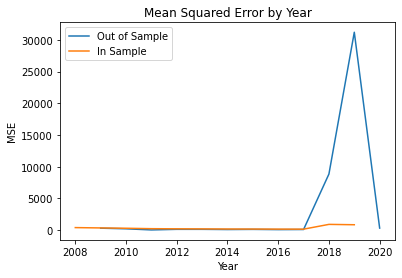

In [35]:
plt.plot(years, MSEs, label='Out of Sample')
plt.plot(years_in_sample, MSEs_in_sample, label='In Sample')
plt.legend()
plt.xlabel('Year')
plt.ylabel('MSE')
plt.title('Mean Squared Error by Year')